In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from nba_api.stats.endpoints.playerdashboardbyshootingsplits import PlayerDashboardByShootingSplits
from nba_api.stats.static.players import find_players_by_full_name

In [2]:
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats


In [3]:
play_types = [
    "PRBallHandler",
    "Isolation",
    "Transition",
    "Spotup",
    "Handoff",
    "OffScreen",
    "Cut",
    "OffRebound",
    "Postup",
    "PRRollman",
]

play_types_seasons = {}


    
def download_play_type_data(season='2019-20'):
    
    play_type_dict = {}
    if season not in play_types_seasons:
        print("Retrieving play types...")
        for play in play_types:
            synergy = SynergyPlayTypes(player_or_team_abbreviation='P', play_type_nullable=play, type_grouping_nullable="offensive", per_mode_simple="PerGame", season=season)
            synergy_df = synergy.get_data_frames()[0]
            play_type_dict[play] = synergy_df
            time.sleep(1)
        play_types_seasons[season] = play_type_dict
    else:
        play_type_dict = play_types_seasons[season]

    
    return play_type_dict




In [6]:
data = download_play_type_data(season='2020-21')

Retrieving play types...


In [7]:
def get_interesting_data(df, target_column):
    final_df = None
    for index, play in enumerate(play_types):
        columns = ["PLAYER_NAME", target_column]
        result = df[play].loc[:, columns]
        result = result.rename(columns={target_column: f'{target_column}_{play}'})
        if index == 0:
            final_df = result
        else:
            final_df = pd.merge(left=final_df, right=result, on='PLAYER_NAME', how='outer')
    final_df = final_df.fillna(0.0)
    return final_df


In [15]:
plt.style.use('fivethirtyeight')

In [9]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2015, 2022)]

## LeBron James

In [10]:
player_name = "LeBron James"

In [12]:
play_type_seasons = {}
target_seasons = []
for season in seasons:
    data = download_play_type_data(season=season)
    int_data = get_interesting_data(data, target_column='POSS')
    player_data = int_data.loc[int_data.PLAYER_NAME == player_name]
    if len(player_data) == 0:
        continue
    target_seasons.append(season)
    player_data.loc[: ,'SEASON'] = season
    play_type_seasons[season] = player_data.iloc[0]

Retrieving play types...


c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Retrieving play types...
Retrieving play types...
Retrieving play types...
Retrieving play types...
Retrieving play types...


In [13]:
values = [play_type_seasons[key].iloc[1:-1].tolist() for key in play_type_seasons]

labels = play_type_seasons['2021-22'].keys()[1:-1]

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Text(0.5, 1.0, 'Possesions by game for {player_name} depending on play type')

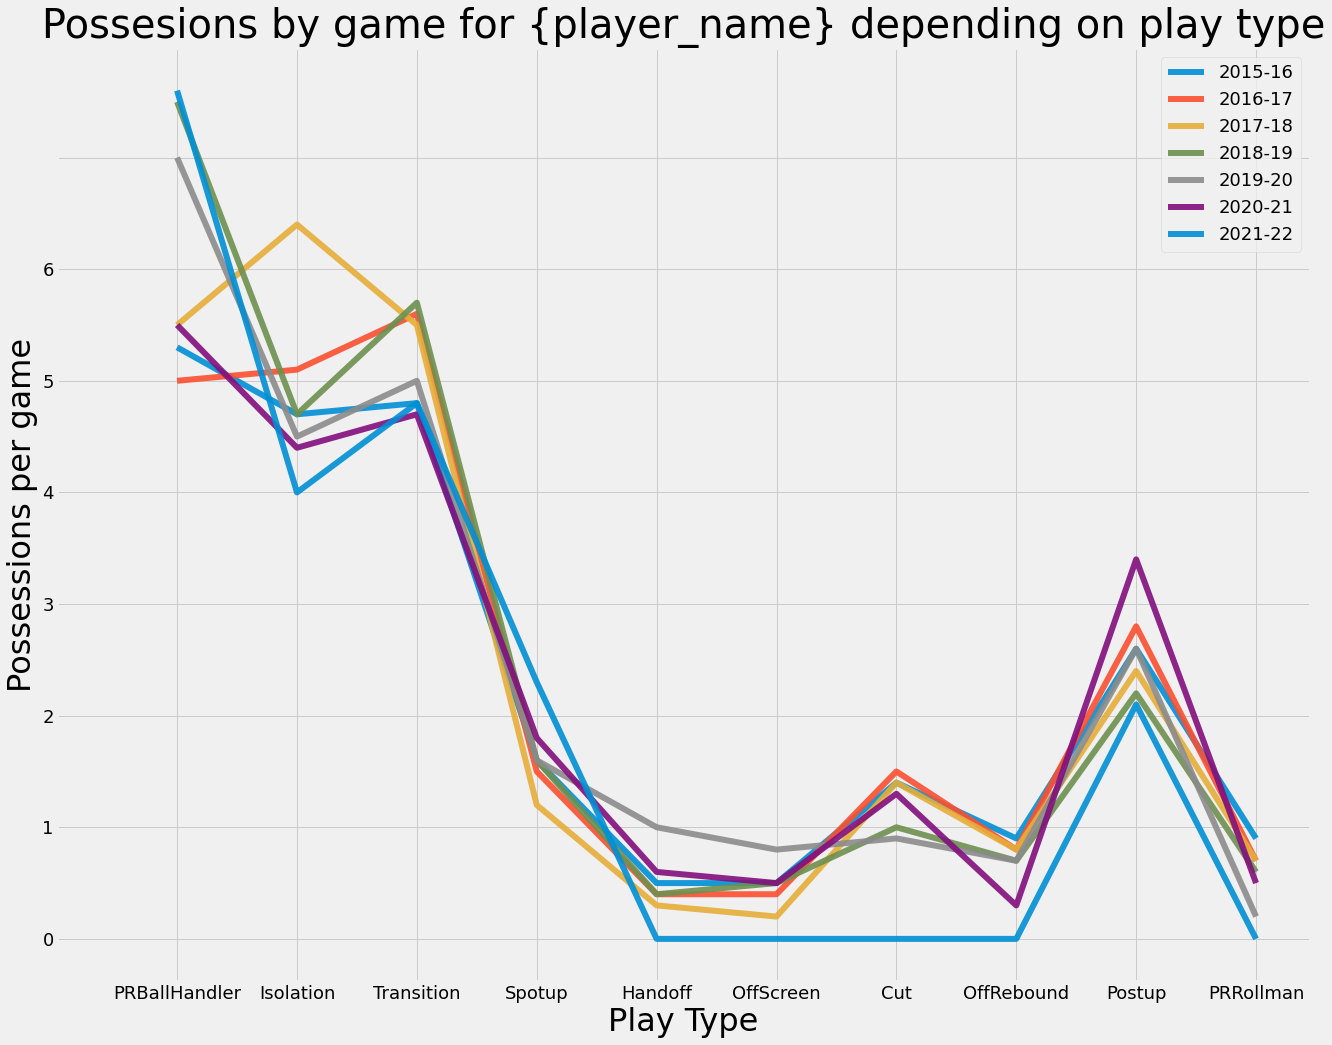

In [16]:
fig, ax = plt.subplots(figsize=(20, 16))

    
for index, item in enumerate(values):
    #player_name = player_names[index]
    item = pd.Series(item)
    ax.plot(item, alpha=0.9, lw=6, label=list(play_type_seasons.keys())[index])
    #x = np.arange(len(play_types))
    #y = np.array([it for it in item])
    #ax.fill_between(x, y, alpha=0.1)
    
ax.set_xticklabels([''] + [item.split("_")[1] for item in list(labels)], size=18)
ax.set_yticklabels(labels=range(-1, 7), size=18)
ax.set_xticks(range(-1, len(labels)))
ax.legend(fontsize=18)
ax.set_xlabel("Play Type", size=32)
ax.set_ylabel("Possessions per game", size=32)
ax.set_title("Possesions by game for {player_name} depending on play type", size=40)

## Locations

In [31]:
def get_labels_lists(player_name, seasons):
    for season in seasons:
        if season in areas_dfs:
            area_df = areas_dfs[season]
        else:
            res = PlayerDashboardByShootingSplits(player_id=player_id, season=season)
            area_df = res.get_data_frames()[3]
            area_df = area_df.loc[area_df.GROUP_VALUE != "Backcourt"]
            total_sum = area_df.FGA.sum()
            area_df.loc[:, "FGA_PCT"] = area_df.FGA / total_sum
            areas_dfs[season] = area_df
        time.sleep(0.3)

    area_values = {}

    for season in seasons:
        area_df = areas_dfs[season]
        for area in area_df.GROUP_VALUE.unique().tolist():
            if area not in area_values:
                area_values[area] = []
            area_values[area].append(area_df.loc[area_df.GROUP_VALUE == area].FGA_PCT.iloc[0])

    lists = []
    labels = []
    for key in area_values:
        labels.append(key)
        lists.append(area_values[key])
    return labels, lists

In [20]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2003, 2022)]

In [21]:
player_name = "LeBron James"

In [22]:
player_id = find_players_by_full_name(player_name)[0]['id']

In [24]:
areas_dfs = {}


In [25]:
for season in seasons:
    if season in areas_dfs:
        area_df = areas_dfs[season]
    else:
        res = PlayerDashboardByShootingSplits(player_id=player_id, season=season)
        area_df = res.get_data_frames()[3]
        area_df = area_df.loc[area_df.GROUP_VALUE != "Backcourt"]
        total_sum = area_df.FGA.sum()
        area_df.loc[:, "FGA_PCT"] = area_df.FGA / total_sum
        areas_dfs[season] = area_df
    time.sleep(0.3)

In [26]:
area_values = {}

for season in seasons:
    area_df = areas_dfs[season]
    for area in area_df.GROUP_VALUE.unique().tolist():
        if area not in area_values:
            area_values[area] = []
        area_values[area].append(area_df.loc[area_df.GROUP_VALUE == area].FGA_PCT.iloc[0])

In [27]:
lists = []
labels = []
for key in area_values:
    labels.append(key)
    lists.append(area_values[key])

In [32]:
labels, lists = get_labels_lists(player_name, seasons)

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


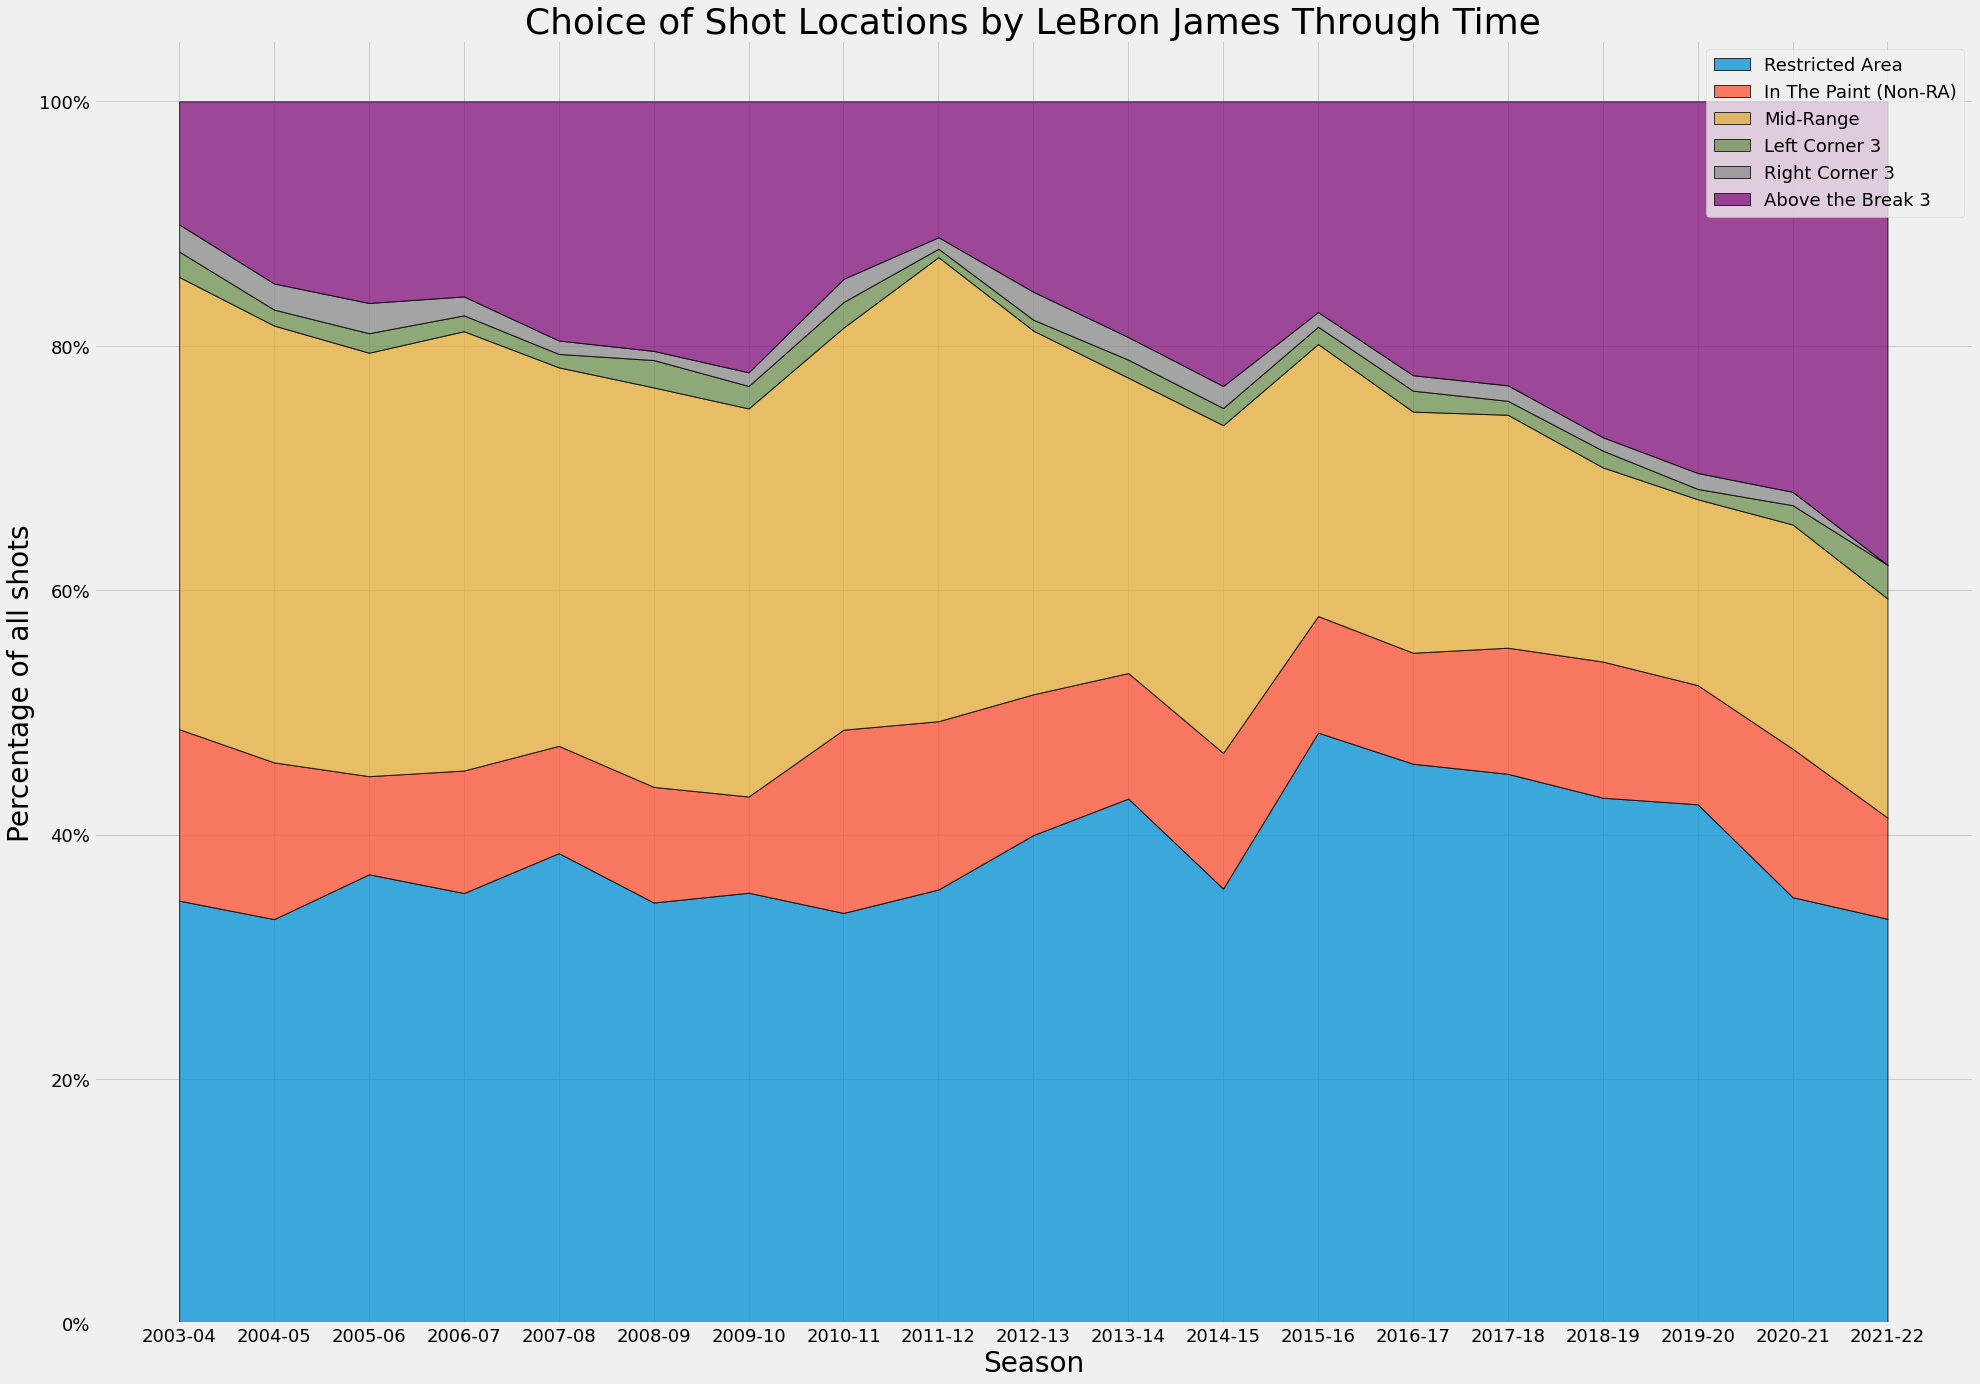

In [33]:
fig, ax = plt.subplots(figsize=(30, 22))

ax.stackplot(seasons, lists, labels=labels, alpha=0.75, lw=1, edgecolors='black')
ax.set_yticklabels([f"{item}%" for item in range(0, 120, 20)], size=18)
ax.set_xticklabels(seasons, size=18)
ax.set_ylabel("Percentage of all shots", size=28)
ax.set_xlabel("Season", size=28)

ax.set_title(f"Choice of Shot Locations by {player_name} Through Time", size=36)
ax.legend(fontsize=18)

## Carmelo Anthony

In [34]:
seasons = [f"{item}-{str(item+1)[-2:]}" for item in range(2003, 2022)]

player_name = "Carmelo Anthony"

In [37]:
labels, lists = get_labels_lists(player_name, seasons)


c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


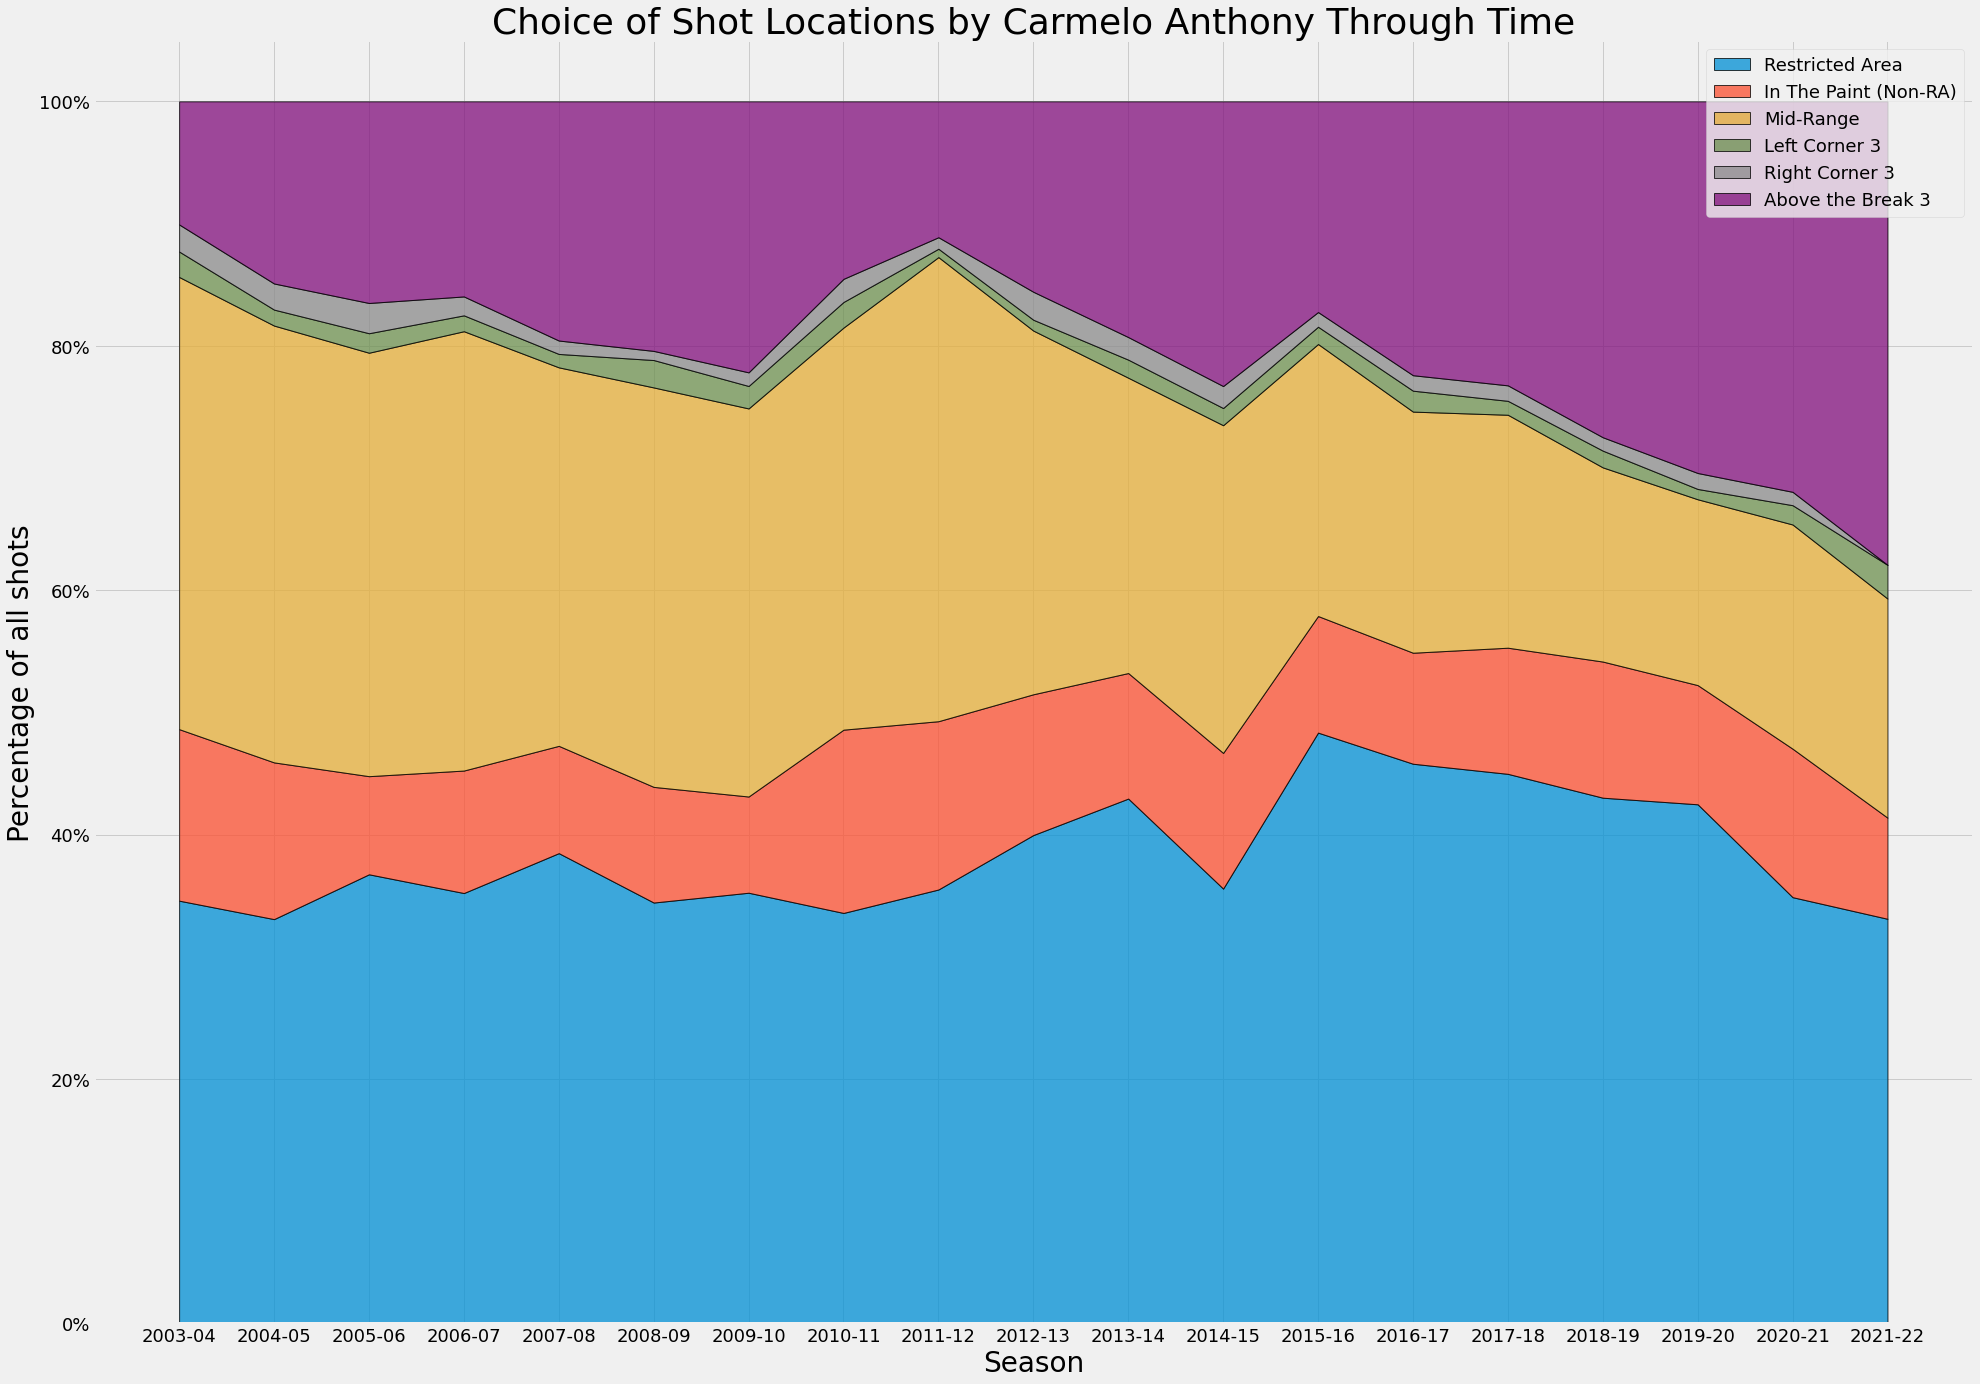

In [38]:

fig, ax = plt.subplots(figsize=(30, 22))

ax.stackplot(seasons, lists, labels=labels, alpha=0.75, lw=1, edgecolors='black')
ax.set_yticklabels([f"{item}%" for item in range(0, 120, 20)], size=18)
ax.set_xticklabels(seasons, size=18)
ax.set_ylabel("Percentage of all shots", size=28)
ax.set_xlabel("Season", size=28)

ax.set_title(f"Choice of Shot Locations by {player_name} Through Time", size=36)
ax.legend(fontsize=18)